## Pandas for the NBA Lover
## Querying and Augmenting DataFrames

The methods for selecting data in the previous section all relied on some sort of *prior knoweldge*, in the form of either label names or positional indexes. In this section, we will first learn about **boolean indexing**, which we use to select all data matching a certain a condition. Those familiar with databases will recognize the similarity between boolean indexing and SQL queries, and for that reason, I will be referring to conditionally selecting data as a *query* from now on.

We will then take the database context one step further and learn how to perform "group by" operations. Finally, we will these two concepts to gain some insight on how PER and RPM vary across positions.

---

First, let's load our dataset, along with our typical configuration options:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# formatting options: 
pd.set_option('display.max_rows', 10)

In [2]:
advanced = pd.read_csv("../data/advanced_metrics.csv", index_col=0)

Everything in this tutorial will focus on around answering the following questions related to PER. First, how does PER vary across positions? And second, are there positions which are more conducive to higher PER values?

To answer these questions, we need to know how to query our data. In pandas, this is done through a mechanism called **boolean indexing**.

### Boolean Indexing

We already touched on how to use the `[]` selector to select data by column labels. But we can also use the bracket selectors with a list of booleans, provided the length of the input list matches the number of rows in the DataFrame. When met with such an input, pandas will return only the rows with positional indexes that correspond with `True` values.

Here's a contrived example, using the first 5 rows of our DataFrame for brevity:

In [3]:
advanced.head()[[True, False, False, True, True]]

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52


For more useful examples of boolean indexing (e.g. querying data), we need to first introduce the concept of vectorized operations.

### Vectorized Operations

As some of you may know, when we multiply a Python list by an integer n, we get n copies of the list stuffed into one:

In [4]:
[1, 2, 3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

When we do the same with a DataFrame or a Series, however, **the operation applies to each row individually**. To demonstrate, we will by dividing the `MPG` column by 48, to get minutes played as a percentage value of a total game:

In [5]:
(advanced.MPG / 48) * 100

PLAYER
James Harden       77.291667
Anthony Davis      76.875000
Paul George        74.375000
Nikola Jokic       65.208333
Kyrie Irving       66.875000
                     ...    
Allonzo Trier      46.041667
Frank Ntilikina    43.958333
Kevin Knox         55.416667
Jamal Crawford     35.833333
Collin Sexton      61.666667
Name: MPG, Length: 343, dtype: float64

Comparision operations that return booleans are also vectorized - for example, greater than:

In [6]:
advanced.USG > 25.0

PLAYER
James Harden        True
Anthony Davis       True
Paul George         True
Nikola Jokic        True
Kyrie Irving        True
                   ...  
Allonzo Trier      False
Frank Ntilikina    False
Kevin Knox         False
Jamal Crawford     False
Collin Sexton       True
Name: USG, Length: 343, dtype: bool

Or equal to:

In [7]:
advanced.POS == 'C'

PLAYER
James Harden       False
Anthony Davis      False
Paul George        False
Nikola Jokic        True
Kyrie Irving       False
                   ...  
Allonzo Trier      False
Frank Ntilikina    False
Kevin Knox         False
Jamal Crawford     False
Collin Sexton      False
Name: POS, Length: 343, dtype: bool

### Querying DataFrames

When we combine these vectorized operations with boolean indexing, we get the ability to query DataFrames. To query for all centers in our DataFrame, we can pass the vectorized output from above into the `[]` selector. 

For those familiar with SQL, this is equivalent to the query `select * from advanced where POS = "C"`

In [8]:
advanced[advanced.POS == 'C']

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Nikola Vucevic,30.7,ORL,C,0.584,16.3,8.9,27.3,8.7,33.8,21.0,25.90,1.94,3.22,5.16
Jusuf Nurkic,27.0,POR,C,0.571,15.8,12.3,24.7,13.7,26.4,20.2,23.87,0.67,3.58,4.25
Rudy Gobert,31.4,UTAH,C,0.667,14.4,10.5,16.9,12.7,30.8,21.8,23.72,0.19,3.86,4.05
Marc Gasol,34.2,MEM,C,0.543,21.3,10.2,22.2,3.3,26.0,14.4,17.72,0.74,2.77,3.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ante Zizic,11.7,CLE,C,0.553,9.9,13.8,18.6,12.3,23.3,17.6,15.15,-2.41,0.67,-1.74
Gorgui Dieng,13.9,MIN,C,0.565,12.5,11.0,16.7,6.5,25.0,15.6,15.21,-2.03,0.26,-1.77
Robin Lopez,16.3,CHI,C,0.543,13.0,18.5,17.1,7.4,9.4,8.4,10.14,-3.41,0.90,-2.51


#### Note
You ay have noticed that the above input to the `[]` selector used a Series object, while the contrived example I introduced boolean indexing with used a list. Using Series objects as the input imposes one more requirement to how boolean indexing works - the index of the input Series and the DataFrame must match. This detail is often overlooked because the input Series is most often derived from a column in the original DataFrame. 

To query on multiple criteria, enclose each condition within parenthesis, and combine them with `&` (and) or `|` (or). We use `&` to query for all players with a Usage Rate higher than 25, and a True Shooting Percentage over 58%, which is quite an esteemed list:

In [9]:
advanced[(advanced.USG > 25.0) & (advanced['TS%'] > .58)]

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52
Stephen Curry,34.5,GS,PG,0.656,18.2,10.2,31.1,2.2,13.6,8.1,25.96,5.15,0.12,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kawhi Leonard,34.6,TOR,SF,0.610,11.4,7.4,29.2,4.1,20.2,12.4,26.95,3.05,-0.18,2.87
Karl-Anthony Towns,33.6,MIN,C,0.597,12.0,11.8,26.9,10.8,29.3,19.9,24.24,1.68,1.09,2.77
Blake Griffin,36.1,DET,PF,0.594,17.2,12.3,30.2,3.6,22.2,12.4,21.44,2.24,0.30,2.54


Finally, we can use `|` in this fancy query to find all players in the 75th percentile or above for either RPM or PER:

In [10]:
advanced[
    (advanced.RPM >= advanced.RPM.describe()['75%']) |
    (advanced.PER >= advanced.PER.describe()['75%'])
]

,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,,
James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
Paul George,35.7,OKC,SF,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67
Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Kyrie Irving,32.1,BOS,PG,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,34.1,CHI,PG,0.566,14.5,12.5,30.6,1.4,12.5,6.9,18.09,0.47,-1.85,-1.38
Tristan Thompson,29.8,CLE,C,0.553,15.6,10.5,17.6,16.3,26.0,20.9,19.20,-0.33,-1.15,-1.48
Enes Kanter,26.5,NY,C,0.593,12.3,11.6,22.1,15.3,28.6,21.6,22.43,-0.31,-1.26,-1.57


#### Note
Boolean indexing also works with the `.loc` and `.iloc` selectors. Somewhat confusingly, when used with `.loc` and `.iloc`, the input boolean list does not need to be the same length as the number of rows in the DataFrame:

In [11]:
advanced.reset_index().loc[[True, True, False, True]]

,PLAYER,MPG,TEAM,POS,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
0,James Harden,37.1,HOU,PG,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
1,Anthony Davis,36.9,NO,PF,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
3,Nikola Jokic,31.3,DEN,C,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29


#### TODO: vectorized operations here -> how we can take `rank()` and assign it to a column in the DataFrame

### Group By

Continuing with our theme of database-style operations, we will now take a look at how to perform "group-by" operations within a DataFrame, which will give us a better sense of how RPM and PER vary per position.

Group by operations follow the ["split-apply-combine"](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) pattern, where a dataset is first **split** into groups based on some criteria. A function is then **applied** to each group, and those results are **combined** into another DataFrame.

The "split-apply-combine" pattern is a general pattern which can be used in many ways. Here, we limit our scope to applying aggregation functions, which summarize the data in a group into a single statistic, such as a median, max, or count. By doing so, we will see how the metrics in our dataset vary across positions.

Our first step is to tell pandas how to split our dataset into groups, which we can do by passing a column name to the `groupby` function, which creates a `DataFrameGroupBy` object:

In [12]:
groups = advanced.groupby(by='POS')
groups

This `DataFrameGroupBy` is a special pandas object. It inherits the same set of columns as our original dataframe, which you can select as you would select columns in a DataFrame. However, this selection doesn't yield any output until you apply a function to the results, such as an aggregation function. 

Luckily, a `DataFrameGroupBy` object comes equipped with many common aggregation functions. One such function is `count()`, which gives us a breakdown of the numbers of players in our DataFrame at each position:

**Note**<br>
This is equivalent to `select count(*) from advanced group by POS` in SQL.
For a more in-depth look at this object, visit the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

In [14]:
groups['POS'].count()

POS
C     45
PF    67
PG    80
SF    75
SG    76
Name: POS, dtype: int64

When we don't select a column, the aggregation function applies to the entire original DataFrame. Here we find the median value of each our advanced statistics, grouped by position:

In [15]:
medians = groups.median()
medians

,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
POS,,,,,,,,,,,,
C,23.10,0.5870,12.5,11.70,18.2,11.10,24.70,17.6,17.940,-0.880,1.570,0.800
PF,23.50,0.5830,11.9,10.80,17.7,6.80,19.20,12.8,15.360,-0.450,0.720,0.510
PG,26.00,0.5305,24.9,10.35,21.1,2.00,9.95,5.8,13.495,-0.135,-0.635,-0.860
SF,24.10,0.5550,13.0,9.60,16.4,3.20,15.10,9.5,11.740,-0.950,-0.280,-0.870
SG,23.95,0.5355,14.5,8.95,18.1,2.25,10.30,6.3,11.910,-0.390,-0.800,-0.965


There are quite a few interesting observations contained within this output, so let's get right into them -  with the help of some visualizations:

### Observations

Let's first look at the data we have about the two sides of the ball - the offensive and defensive components of RPM.

In [17]:
medians[['ORPM', 'DRPM']]

,ORPM,DRPM
POS,,
C,-0.880,1.570
PF,-0.450,0.720
PG,-0.135,-0.635
SF,-0.950,-0.280
SG,-0.390,-0.800


The data reveals a trend, Centers have the highest Defensive RPM but the lowest Offensive RPM, while Point Guards have the highest Offensive RPM but the lowest Defensive RPM. This general trend holds for all positions between Center and Point Guard, and can be interpreted as a looose rule of NBA basketball:

Defense goes up as player size goes up, while offense goes up as player size goes down.

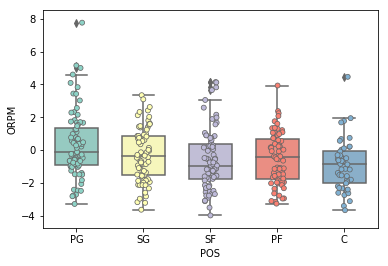

In [80]:
import seaborn as sns


def box_and_strip(stat):
    sns.boxplot(x="POS", y=stat, order=['PG', 'SG', 'SF', 'PF', 'C'], 
              data=advanced, palette="Set3", width=0.65)

    sns.stripplot(x="POS", y=stat, order=['PG', 'SG', 'SF', 'PF', 'C'], 
              data=advanced, palette="Set3", linewidth=.75)

box_and_strip("ORPM")

While James Harden's ridiculous 7.76 ORPM (upper left) distorts the scale slightly and reduces the visual effect of the trend, it is much more noticeable for DRPM:

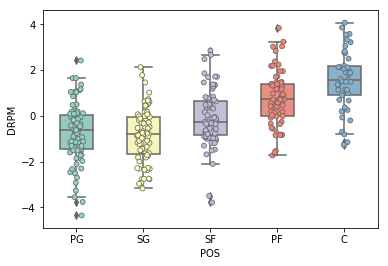

In [68]:
box_and_strip("DRPM")

The negative correlation between ORPM and size is interesting, especially since True Shooting % increases with size. To me this makes sense - smaller players improve offenses with their shooting (spacing) and playmaking rather than their efficiency. 

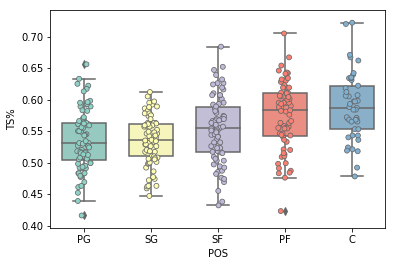

In [108]:
box_and_strip("TS%")

The same type of visualization also shows how PER overrates centers, who seem to have a much higher "baseline" PER value than other positions:

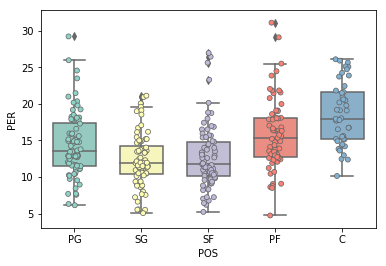

In [82]:
box_and_strip("PER")

In [129]:
advanced['rank'] = advanced['PER'].rank(ascending=False)

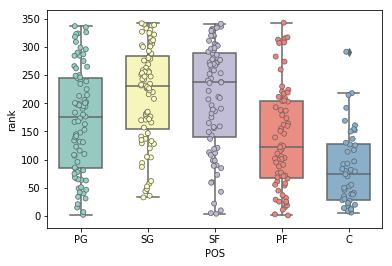

In [130]:
box_and_strip("rank")

A large part of this bump can be attributed to the rebound rates of Centers and Power Forwards:

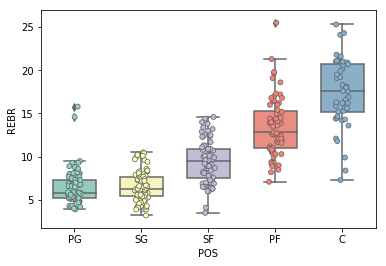

In [121]:
box_and_strip("REBR")

While Point Guards reap the benefits of their assists:

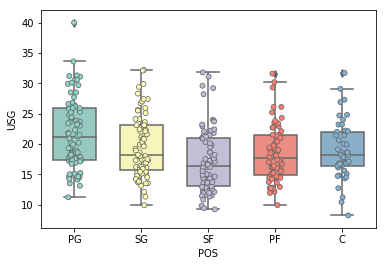

In [123]:
box_and_strip("USG")

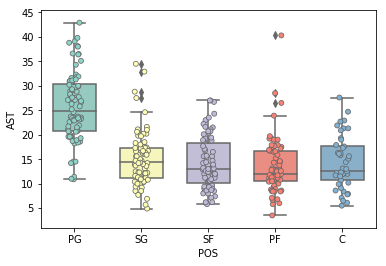

In [122]:
box_and_strip("AST")

These visualizations about PER aren't meant as an indictment on PER as a metric, but rather, to illustrate the importance of knowing what a metric is measuring.

### Recap